In [2]:
import numpy as np 
import os 
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [9]:
def local_scaling(x):
    """Scaling an array to fit between -1 and 1"""
    x_min = np.min(x)
    x_max = np.max(x)
    x_normed = (x - x_min) / (x_max - x_min)
    x_scaled = 2 * x_normed - 1
    
    return x_scaled

In [80]:
def local_norming(x):
    x -= np.mean(x)
    x /= np.max(np.abs(x))
    
    return x

def remove_silence(signal):
    fs = 48000
    segment_length = int(1 * fs)  # 100ms
    threshold = 0.001
    
    # Number of segments
    num_segments = signal.shape[1] // segment_length

    # Initialize a 3D numpy array for the segments
    segments = np.zeros((signal.shape[0], num_segments, segment_length))

    # Split the signal into segments for each channel
    for i in range(num_segments):
        segments[:, i, :] = signal[:, i*segment_length:(i+1)*segment_length]

    # Calculate the absolute maximum value in each segment for each channel
    max_values = np.max(np.abs(segments), axis=2)

    # Identify the segments where the maximum value is above the threshold for any channel
    keep_segments = np.any(max_values > threshold, axis=0)

    # Keep only the segments where the maximum value is above the threshold for any channel
    new_signal = np.concatenate(segments[:, keep_segments, :], axis=1)

    # Reshape the new_signal array to maintain the 4-channel structure
    new_signal = new_signal.reshape((4, -1))
    
    return new_signal

def remove_1D_silence(signal, signal_3D):
    fs = 48000
    segment_length = int(1 * fs)  # 100ms
    threshold = 0.01
    
    # Number of segments
    num_segments = signal.shape[0] // segment_length

    # Initialize a 3D numpy array for the segments
    segments = np.zeros((num_segments, segment_length))

    # Split the signal into segments for each channel
    for i in range(num_segments):
        segments[i, :] = signal[i*segment_length:(i+1)*segment_length]

    # Calculate the absolute maximum value in each segment for each channel
    max_values = np.max(np.abs(segments), axis=1)

    # Identify the segments where the maximum value is above the threshold for any channel
    keep_segments = np.any(max_values > threshold, axis=0)

    # Keep only the segments where the maximum value is above the threshold for any channel
    new_signal = np.concatenate(segments[:, keep_segments, :], axis=-1)

    # # Reshape the new_signal array to maintain the 4-channel structure
    # new_signal = new_signal.reshape((4, -1))
    
    return new_signal

In [82]:
test_track = './data/scaled_audio/Dog/Dog_angle_150_concatenated.wav'
final_dir = './data/remove_silence/'
fs = 48000
one_frame = int(fs*0.1)

audio_data , _ = librosa.load(test_track, sr=fs , mono=False, dtype=np.float32)
result = []
for i in range(len(audio_data)):
    a = local_scaling(audio_data[0])
    result.append(a)

result = np.array(result)
# sf.write('normed.wav', result.T, samplerate=fs)

result_without_silence = remove_silence(result)
sf.write('try.wav', result_without_silence.T, samplerate=fs)




In [61]:
segment_length = int(0.1 * fs)  # 100ms
threshold = 0.03
signal = result

# Number of segments
num_segments = signal.shape[1] // segment_length

# Initialize a 3D numpy array for the segments
segments = np.zeros((signal.shape[0], num_segments, segment_length))

# Split the signal into segments for each channel
for i in range(num_segments):
    segments[:, i, :] = signal[:, i*segment_length:(i+1)*segment_length]

# Calculate the absolute maximum value in each segment for each channel
max_values = np.max(np.abs(segments), axis=2)

# Identify the segments where the maximum value is above the threshold for any channel
keep_segments = np.any(max_values > threshold, axis=0)

# Keep only the segments where the maximum value is above the threshold for any channel
new_signal = np.concatenate(segments[:, keep_segments, :], axis=1)

# Reshape the new_signal array to maintain the 4-channel structure
new_signal = new_signal.reshape((4, -1))

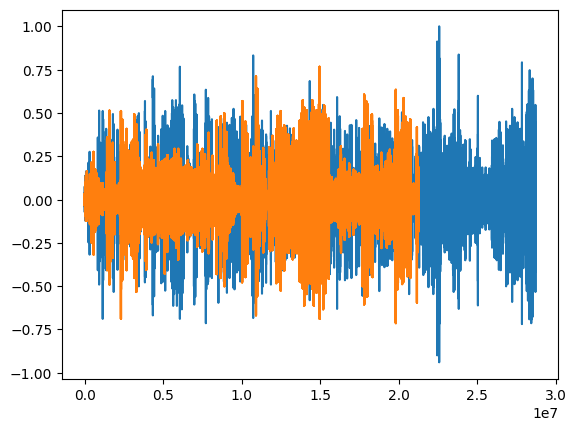

In [64]:
plt.plot(result[0])
plt.plot(new_signal[0])